Import Data set 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

# Load the data using pandas 
data = pd.read_csv('GlobalTemperatures.csv', encoding="ISO-8859-1",low_memory=False)

# print(data.head())

print(data.info())
# print(data.shape())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None


Preprocessing of Data Set 

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [5]:
# Summary statistics for the 'LandAverageTemperature' column
temperature_stats = data['LandAverageTemperature'].describe()
print("\nSummary Statistics for LandAverageTemperature:\n", temperature_stats)


Summary Statistics for LandAverageTemperature:
 count    3180.000000
mean        8.374731
std         4.381310
min        -2.080000
25%         4.312000
50%         8.610500
75%        12.548250
max        19.021000
Name: LandAverageTemperature, dtype: float64


In [6]:
# Handling missing values
# Drop rows with missing 'LandAverageTemperature' as it's critical for analysis
data_cleaned = data.dropna(subset=['LandAverageTemperature'])

In [10]:
print(data_cleaned.shape)

(3180, 9)


In [11]:
print(data_cleaned['LandAndOceanAverageTemperature'].value_counts())

LandAndOceanAverageTemperature
15.005    5
13.260    4
16.783    4
15.927    4
16.846    4
         ..
15.001    1
14.138    1
15.749    1
17.257    1
17.462    1
Name: count, Length: 1577, dtype: int64


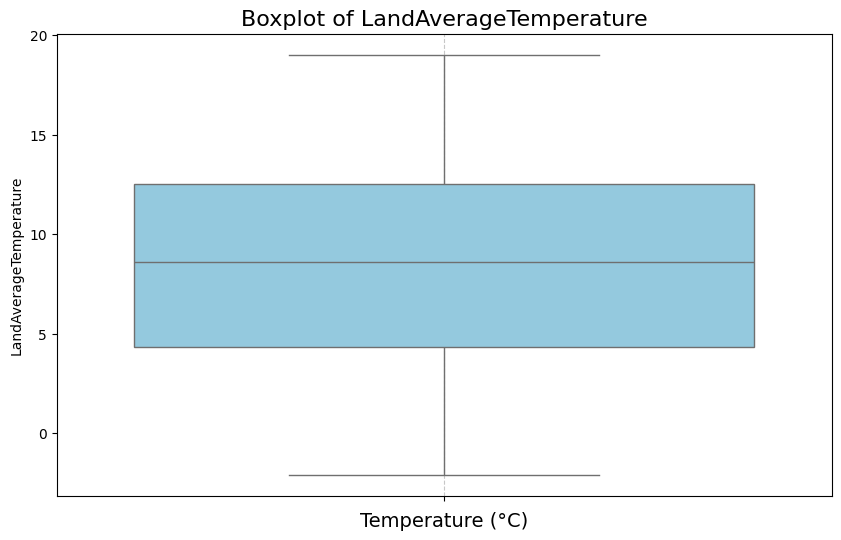

In [14]:

# Visualize the distribution of 'LandAverageTemperature' to identify outliers
plt.figure(figsize=(10, 6))
y = data_cleaned['LandAverageTemperature']
sb.boxplot(y, color='skyblue')
plt.title('Boxplot of LandAverageTemperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12280\2477627017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_cleaned['LandAverageTemperature'])


<Axes: xlabel='LandAverageTemperature', ylabel='Density'>

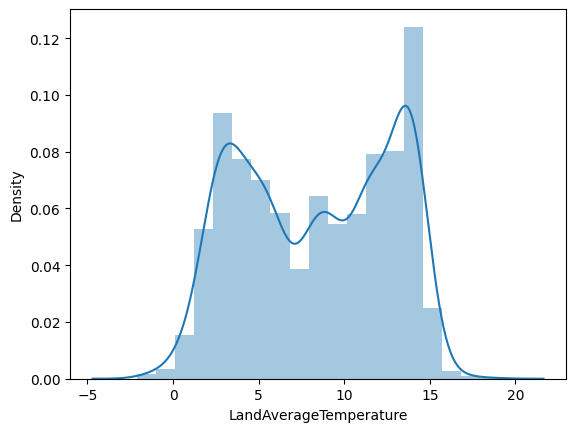

In [16]:
sb.distplot(data_cleaned['LandAverageTemperature'])

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [18]:
# Step 1: Handle Missing Values
# Impute missing numeric values with the mean
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="mean")
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Step 2: Normalize Numeric Features
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 3: Encode Categorical Variables
# If the dataset has categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [19]:
# Display preprocessed data
print(data.head())

    dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  464                0.242358                           0.451185   
1  465                0.244680                           0.467499   
2  466                0.365196                           0.387713   
3  467                0.500924                           0.308055   
4  468                0.647031                           0.259750   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0            0.548029                       0.100666            0.538989   
1            0.548029                       0.100666            0.538989   
2            0.548029                       0.100666            0.538989   
3            0.548029                       0.100666            0.538989   
4            0.548029                       0.100666            0.538989   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       0.112033                        0.53

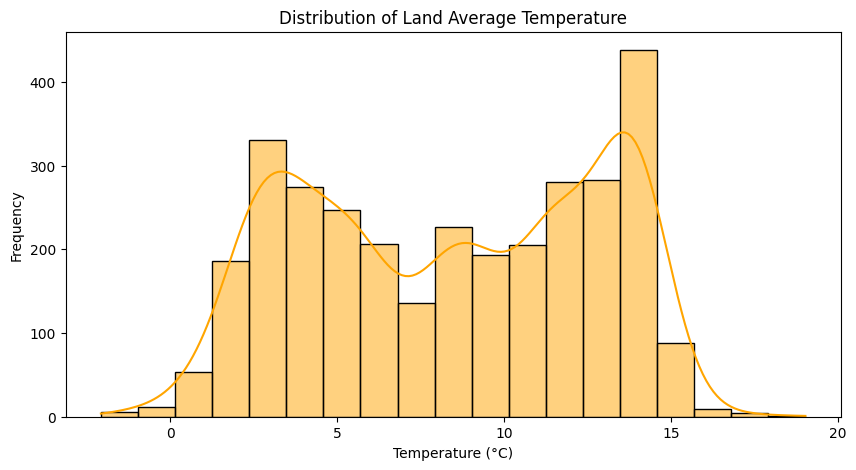

In [28]:
import seaborn as sns

# Histogram of Land Average Temperature
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned["LandAverageTemperature"], kde=True, color="orange")
plt.title("Distribution of Land Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


In [2]:
import pandas as pd
# Bar chart for yearly average temperature
data_cleaned['Year'] = pd.to_datetime(data_cleaned['dt']).dt.year
yearly_avg = data.groupby("Year")["LandAverageTemperature"].mean()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind="bar", color="purple")
plt.title("Average Land Temperature Per Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()


NameError: name 'data_cleaned' is not defined

C:\Users\Admin\AppData\Local\Temp\ipykernel_9224\1639680818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='iyear', data=data, palette='RdYlGn_r', edgecolor=sb.color_palette('dark', 10))


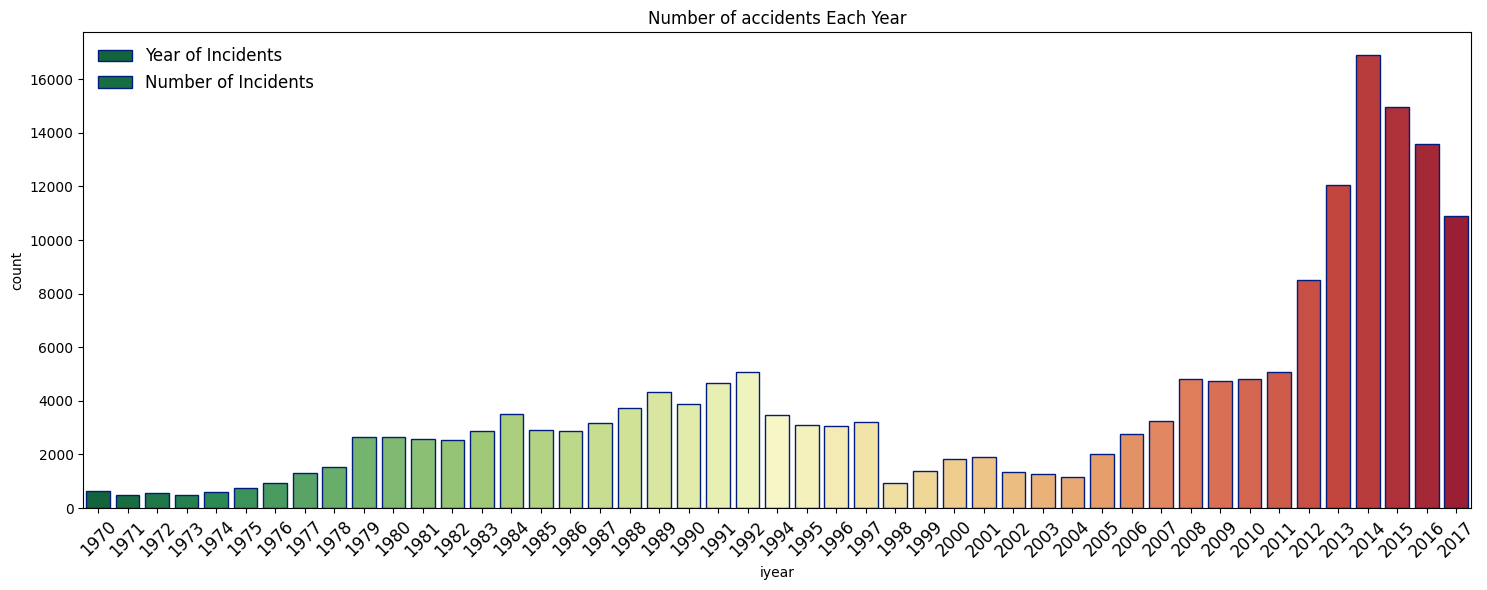

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set up the figure size
plt.subplots(figsize=(15,6))

# Count incidents by country and display them (this line is not necessary for the countplot, so it's removed from repetition)
country_incidents = data['country_txt'].value_counts()

# Plot the countplot for the 'iyear' column
sb.countplot(x='iyear', data=data, palette='RdYlGn_r', edgecolor=sb.color_palette('dark', 10))
plt.title('Temprature over year')
plt.xticks(rotation=45, fontsize=12)

# Add legend
# Create a custom legend inside the graph
plt.legend(
    labels=['Year of Incidents', 'Number of Incidents'],  # Custom legend labels
    loc='upper left',  # Location inside the graph
    frameon=False,  # Removes the background frame for a cleaner look
    fontsize=12
)

plt.tight_layout()
# Display the plot
plt.show()


In [ ]:
import plotly.express as px

# Create an interactive count plot using Plotly
fig = px.histogram(data, x='iyear', color='iyear', 
                   title="Temprature over year by Year",
                   labels={'iyear': 'Year'},)

# Update layout for better visibility
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Temprature over year',
    xaxis_tickangle=45,
    legend_title='Year',
    template='plotly_dark',  # Optional: for a dark theme
)

# Show the plot
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9224\3116160344.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




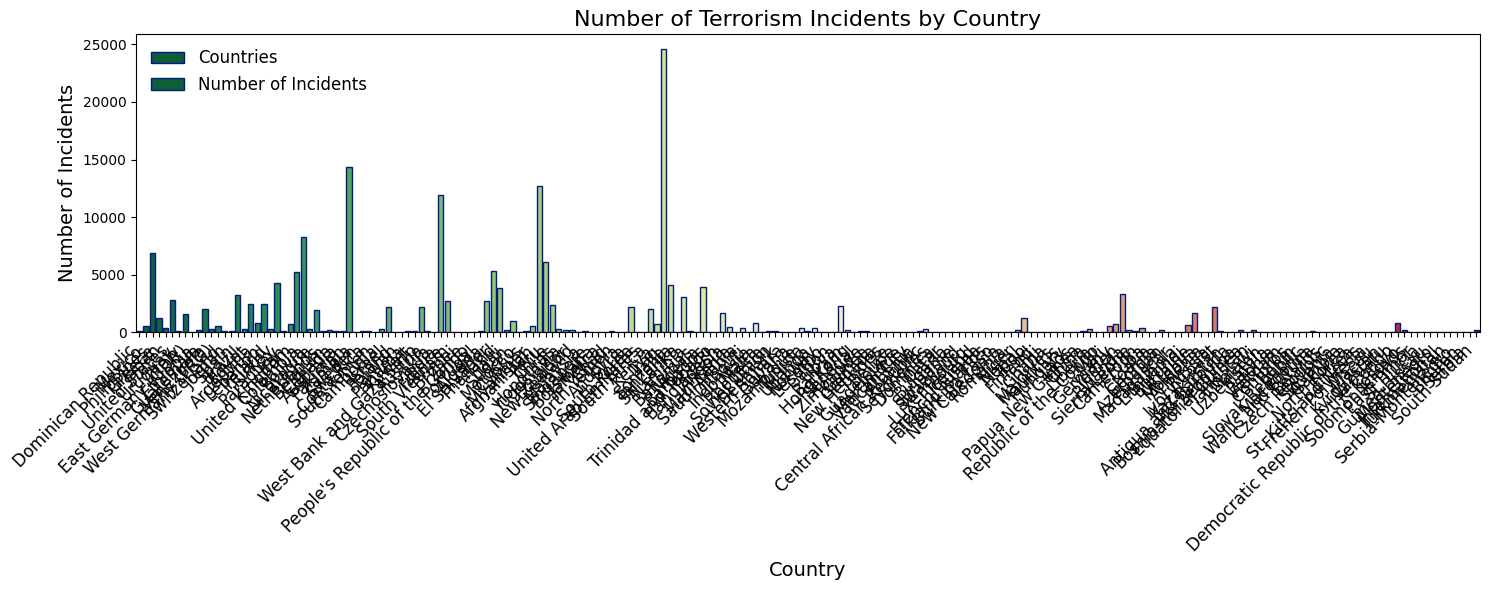

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set up the figure size
plt.subplots(figsize=(15, 6))

# Count incidents by country and display them
country_incidents = data['country_txt'].value_counts()

# Plot the countplot for the 'country_txt' column
sb.barplot(x=data['country_txt'], y=country_incidents, palette='RdYlGn_r', edgecolor=sb.color_palette('dark', 10))

# Title and labels
plt.title('Number of Terrorism Incidents by Country', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Add a custom legend inside the graph (we'll modify the legend for clarity, although countplot doesn't typically require hue)
plt.legend(
    labels=['Countries', 'Number of Incidents'],  # Custom legend labels (adjust to the plot context)
    loc='upper left',  # Location inside the graph
    frameon=False,  # Remove background frame for clarity
    fontsize=12
)

# Adjust layout for better fit and presentation
plt.tight_layout()

# Display the plot
plt.show()


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


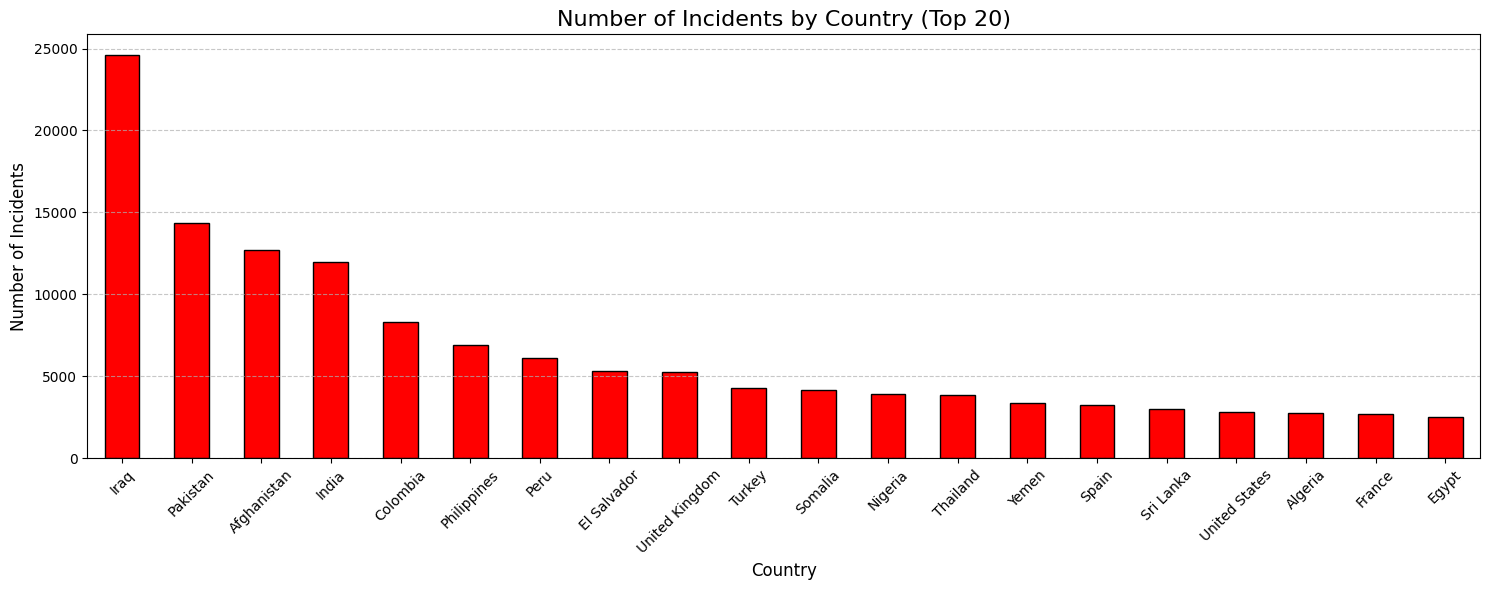

In [38]:

# Inspect the column names
print(data.columns)

# Group data by the correct column name for country
country_incidents = data['country_txt'].value_counts()

# Plot the data
plt.figure(figsize=(15, 6))
country_incidents.head(20).plot(kind='bar', color='red', edgecolor='black')
plt.title("Number of Incidents by Country (Top 20)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


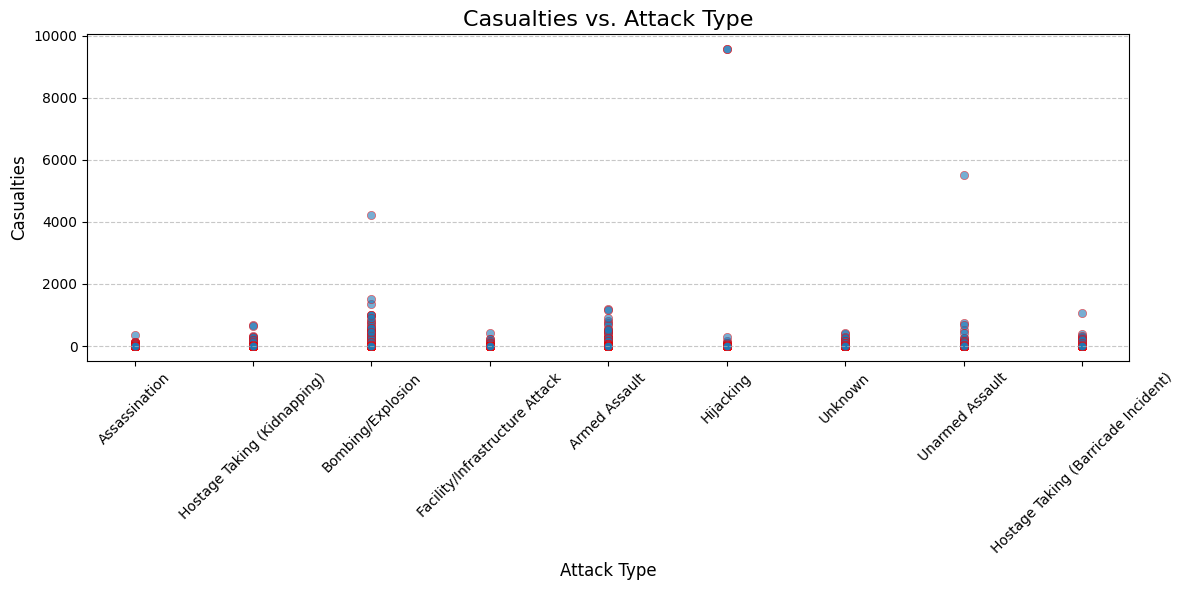

In [39]:


# Create a new column for casualties
data['casualties'] = data['nkill'] + data['nwound']

# Scatter plot: Casualties vs. Attack Type
plt.figure(figsize=(12, 6))
sb.scatterplot(
    x=data['attacktype1_txt'],
    y=data['casualties'],
    alpha=0.6,
    edgecolor='red'
)

# Customize the plot
plt.title("Casualties vs. Attack Type", fontsize=16)
plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Casualties", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


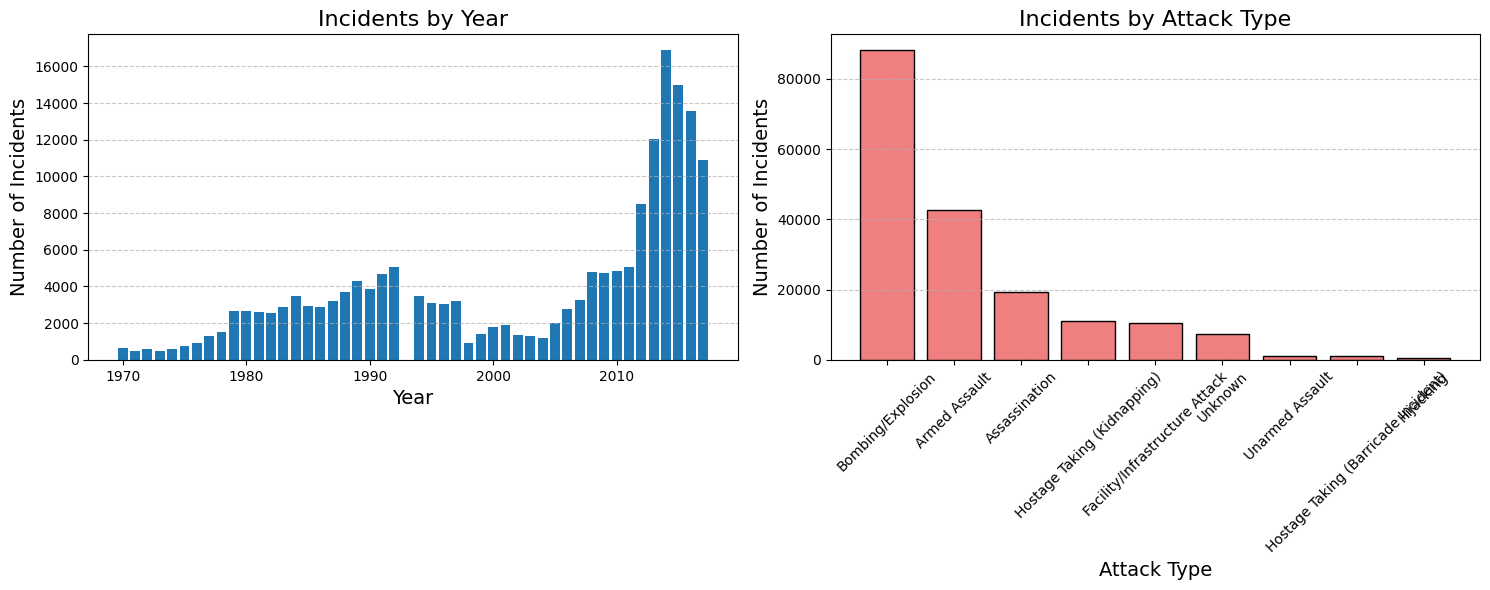

In [8]:

# Group data by year and attack type
incidents_by_year = data['iyear'].value_counts().sort_index()
incidents_by_attack = data['attacktype1_txt'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot incidents by year
axes[0].bar(incidents_by_year.index, incidents_by_year.values)
axes[0].set_title('Incidents by Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Number of Incidents', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot incidents by attack type
axes[1].bar(incidents_by_attack.index, incidents_by_attack.values, color='lightcoral', edgecolor='black')
axes[1].set_title('Incidents by Attack Type', fontsize=16)
axes[1].set_xlabel('Attack Type', fontsize=14)
axes[1].set_ylabel('Number of Incidents', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(figsize=(15,6))
year_cs = data.groupby('iYear').casualities.sum().to_frame().reset_index()
year_cs.columns = ['iyear','casualities']
sb.barplot(x=year_cs,y=year_cs.casualities)
plt.show()


In [ ]:

# Create a pivot table to count occurrences of each combination
heatmap_data = data.pivot_table(
    index='attacktype1_txt', 
    columns='targtype1_txt', 
    aggfunc='size', 
    fill_value=0
)

# Customize heatmap settings
plt.figure(figsize=(12, 8))  # Larger figure size for better readability
sb.set_theme(style="whitegrid")  # Set a clean theme

# Draw the heatmap with additional enhancements
heatmap = sb.heatmap(
    heatmap_data, 
    annot=True,          # Display data values in each cell
    fmt='d',             # Data values are integers
    cmap='coolwarm',     # Beautiful color palette
    linewidths=1,        # Add grid lines between cells
    linecolor='white',   # Grid line color
    cbar_kws={'label': 'Number of Incidents'},  # Add color bar label
)

# Add titles and labels with formatting
plt.title('Heatmap of Attack Type vs Target Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Target Type', fontsize=14, labelpad=15)
plt.ylabel('Attack Type', fontsize=14, labelpad=15)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:

# Map region names to numeric codes
data['region_num'] = data['region_txt'].astype('category').cat.codes

# Extract data for plotting
x = data['iyear']       # Year
y = data['region_num']  # Region (numeric)
z = data['nkill']       # Casualties

# Create a 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhancements
scatter = ax.scatter(x, y, z, c=z, cmap='plasma', s=100, edgecolor='black')

# Set plot title and axis labels
ax.set_title("3D Plot: Terrorist Activities by Year, Region, and Casualties", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Region", fontsize=12)
ax.set_zlabel("Casualties", fontsize=12)

# Replace numeric region codes with actual region names
region_names = dict(enumerate(data['region_txt'].astype('category').cat.categories))
ax.set_yticks(list(region_names.keys()))
ax.set_yticklabels(region_names.values(), fontsize=10)

# Add a color bar for casualties
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.6)
cbar.set_label("Number of Casualties", fontsize=12)

# Additional enhancements
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile from 110_natural directory
shapefile_path = "110m_cultural/ne_110m_admin_0_countries.shp"  # Update the path
world = gpd.read_file(shapefile_path)

# Step 2: Load incident data
incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')

# Step 3: Aggregate incidents by country
if 'country_txt' in incident_data.columns:  # Replace 'Country' with the actual column name
    incidents_by_country = incident_data['country_txt'].value_counts().reset_index()
    incidents_by_country.columns = ['NAME', 'Incidents']  # Rename columns for merging

    # Step 4: Merge world shapefile with incident data
    world = world.merge(incidents_by_country, how='left', on='NAME')

    # Step 5: Plot the choropleth map
    world.plot(column='Incidents', cmap='OrRd', legend=True, 
               missing_kwds={"color": "lightgrey", "label": "No Data"})
    plt.title("Incidents by Country")
    plt.show()

else:
    print("The 'Country' column is missing in the incident_data file. Please verify.")


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17084\2205939436.py:13: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')


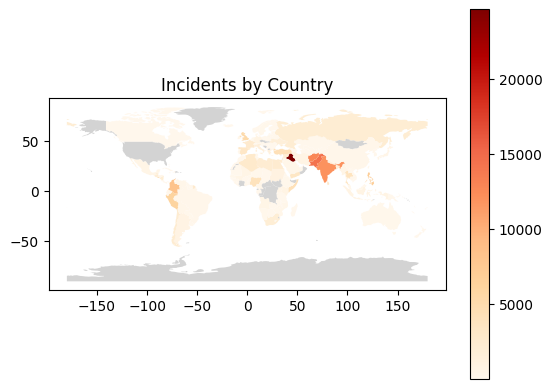

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile from 110_natural directory
shapefile_path = "110m_cultural/ne_110m_admin_0_countries.shp"  # Update the path
world = gpd.read_file(shapefile_path)

print(world.columns)


# Step 2: Load incident data
incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')

# Step 3: Aggregate incidents by country
if 'country_txt' in incident_data.columns:  # Replace 'Country' with the actual column name
    incidents_by_country = incident_data['country_txt'].value_counts().reset_index()
    incidents_by_country.columns = ['NAME', 'Incidents']  # Rename columns for merging

    # Step 4: Merge world shapefile with incident data
    world = world.merge(incidents_by_country, how='left', on='NAME')

    # Step 5: Plot the choropleth map
    world.plot(column='Incidents', cmap='OrRd', legend=True, 
               missing_kwds={"color": "lightgrey", "label": "No Data"})
    plt.title("Temprature by Country")
    plt.show()

else:
    print("The 'Country' column is missing in the incident_data file. Please verify.")


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17084\1380184228.py:13: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')


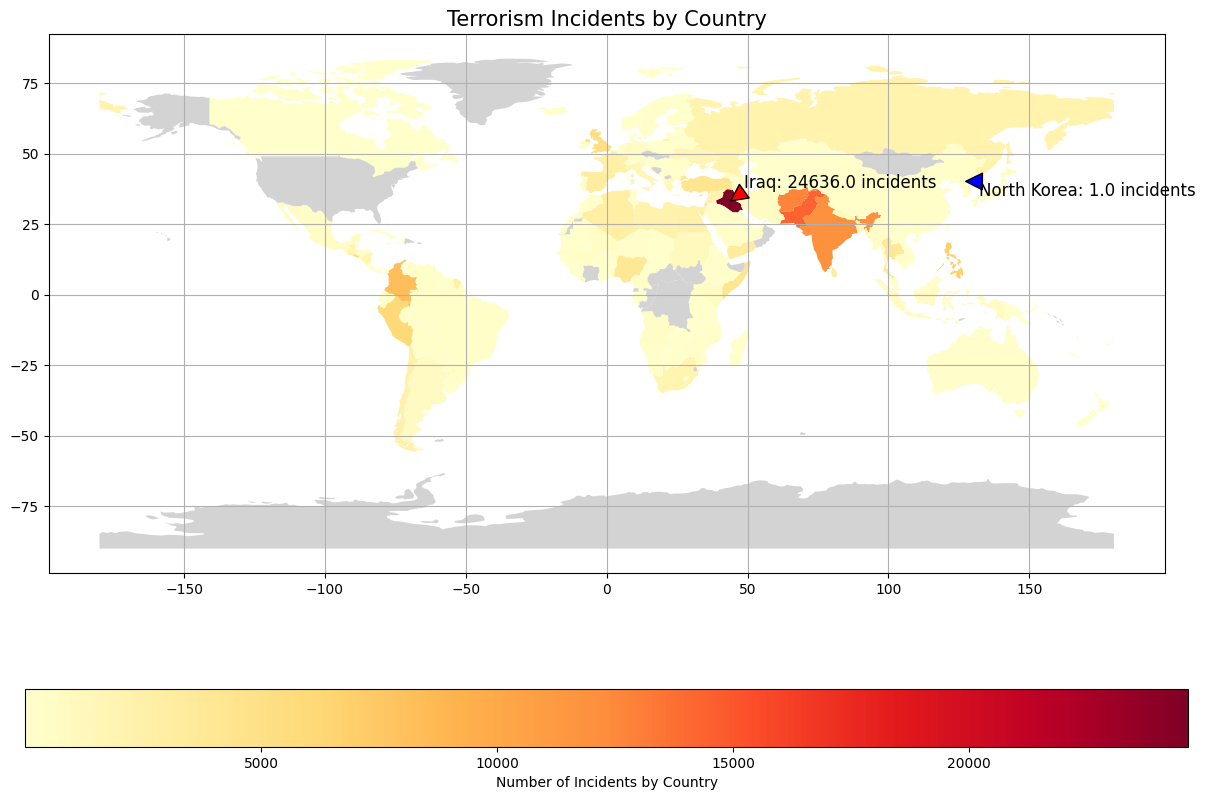

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the shapefile from 110_natural directory
shapefile_path = "110m_cultural/ne_110m_admin_0_countries.shp"  # Update the path
world = gpd.read_file(shapefile_path)

# Check the columns to inspect the structure of the world GeoDataFrame
print(world.columns)

# Step 2: Load incident data
incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')

# Step 3: Aggregate incidents by country
if 'country_txt' in incident_data.columns:  # Ensure correct column name
    incidents_by_country = incident_data['country_txt'].value_counts().reset_index()
    incidents_by_country.columns = ['NAME', 'Incidents']  # Rename columns for merging

    # Step 4: Merge world shapefile with incident data
    world = world.merge(incidents_by_country, how='left', on='NAME')

    # Step 5: Plot the choropleth map with enhancements
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Plot the world map with 'Incidents' data
    world.plot(column='Incidents', ax=ax, cmap='YlOrRd', legend=True,
               legend_kwds={'label': "Number of Incidents by Country",
                            'orientation': "horizontal"},
               missing_kwds={"color": "lightgrey", "label": "No Data"})

    # Add title and grid
    plt.title("Terrorism Incidents by Country", fontsize=15)
    plt.grid(True)

    # Annotate the highest and lowest countries (optional)
    max_country = world.loc[world['Incidents'].idxmax()]
    min_country = world.loc[world['Incidents'].idxmin()]

    ax.annotate(f"{max_country['NAME']}: {max_country['Incidents']} incidents", 
                xy=(max_country.geometry.centroid.x, max_country.geometry.centroid.y), 
                xytext=(max_country.geometry.centroid.x + 5, max_country.geometry.centroid.y + 5),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='black')

    ax.annotate(f"{min_country['NAME']}: {min_country['Incidents']} incidents", 
                xy=(min_country.geometry.centroid.x, min_country.geometry.centroid.y), 
                xytext=(min_country.geometry.centroid.x + 5, min_country.geometry.centroid.y - 5),
                arrowprops=dict(facecolor='blue', shrink=0.05),
                fontsize=12, color='black')

    # Show the plot
    plt.show()

else:
    print("The 'country_txt' column is missing in the incident_data file. Please verify.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_17084\2261549168.py:12: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')


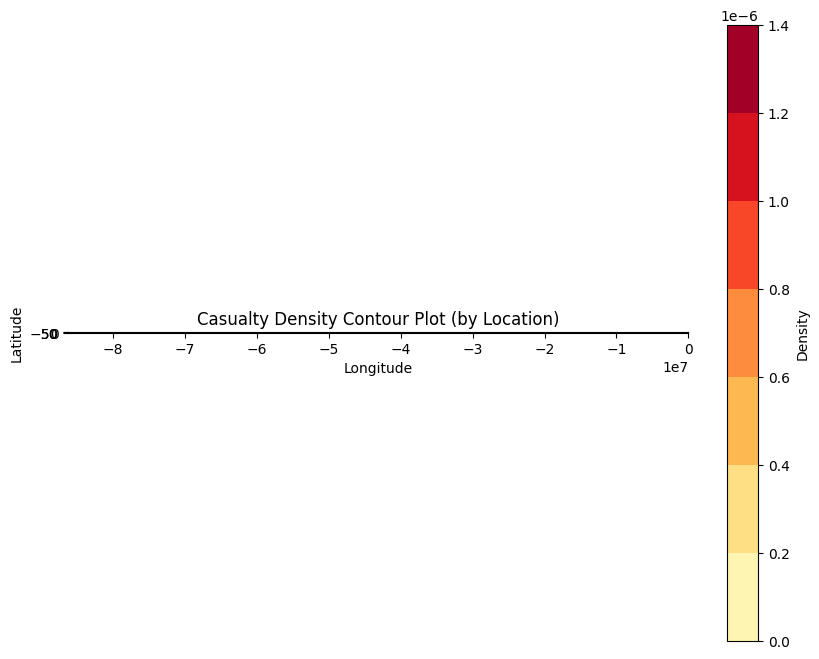

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Step 1: Load the shapefile from 110_natural directory
shapefile_path = "110m_cultural/ne_110m_admin_0_countries.shp"  # Update the path
world = gpd.read_file(shapefile_path)

# Step 2: Load incident data
incident_data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')

# Step 3: Filter incidents with casualties (deaths or injuries)
# Assuming 'deaths' and 'injuries' columns are present in the incident data
incident_data = incident_data[(incident_data['nkill'] > 0) | (incident_data['nwound'] > 0)]

# Step 4: Get the coordinates of the incidents (longitude, latitude)
# Assuming 'longitude' and 'latitude' columns are present in the incident data
incident_data = incident_data.dropna(subset=['longitude', 'latitude'])
coords = incident_data[['longitude', 'latitude']]

# Step 5: Create the density estimate using Gaussian Kernel Density Estimation (KDE)
kde = gaussian_kde([coords['longitude'], coords['latitude']], bw_method=0.1)
x_grid, y_grid = np.meshgrid(np.linspace(coords['longitude'].min(), coords['longitude'].max(), 100),
                             np.linspace(coords['latitude'].min(), coords['latitude'].max(), 100))
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = kde(positions).reshape(x_grid.shape)

# Step 6: Plot the contour plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.contourf(x_grid, y_grid, density, cmap='YlOrRd')
ax.set_title("Casualty Density Contour Plot (by Location)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.colorbar(ax.contourf(x_grid, y_grid, density, cmap='YlOrRd'), ax=ax, label='Density')

# Step 7: Optionally, add country boundaries from GeoDataFrame
world.boundary.plot(ax=ax, linewidth=1, color='black')

plt.show()
